In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
##import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## here Exited is  dependent feature and except Exited all are independent Featurfe

In the above dataset the feature like RowNumber,customerID,Surname are not so important so that we dont include them for our deviding the column into dependent and independent variable.

In [ ]:
#basically devide the dataset into independent and dependent feature
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13:]

In [ ]:
X.shape

(10000, 10)

In [ ]:
y.shape

(10000, 1)

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


in the x there are some categorical data such as Geography and Gender columns so that we have to convert them using One hot Encoding or Pd.get_dummies like this all this things we have to do in the feature enhineering process.

##Feature Engineering

In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender=pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
##Concatenate these varibales with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


#firstly we have to drop those Geography and Gender column as we have extract  or convert the categorical value into numerical value using get_dummies


In [ ]:
##concatenate the value into the X
updated_X=pd.concat([X,geography,gender],axis=1)
updated_X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


##splitting the datset into train and test

In [ ]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

##Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [ ]:
X_train.shape

(8000, 8)

In [ ]:
X_test.shape

(2000, 8)

##Part 2
#Lets Create the Artificial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
##lets initiaize ANN
classifier=Sequential()


In [ ]:
##Adding the input Layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
##Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
##Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))


In [ ]:
##Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))  ## here we add outout activation fuction as sigmoid as it is a Binary Classification.

In [ ]:
##train the entire neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
##Early Stopping  ## it is used when the score improve much more then it automatically stop the training.
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.4837 - accuracy: 0.7962 - val_loss: 0.4513 - val_accuracy: 0.7967
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4390 - accuracy: 0.8108 - val_loss: 0.4402 - val_accuracy: 0.8107
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4291 - accuracy: 0.8222 - val_loss: 0.4315 - val_accuracy: 0.8194
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4176 - accuracy: 0.8272 - val_loss: 0.4220 - val_accuracy: 0.8220
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4059 - accuracy: 0.8293 - val_loss: 0.4113 - val_accuracy: 0.8220
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3941 - accuracy: 0.8337 - val_loss: 0.4004 - val_accuracy: 0.8330
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3850 - accuracy: 0.8429 - val_loss: 0.3923 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

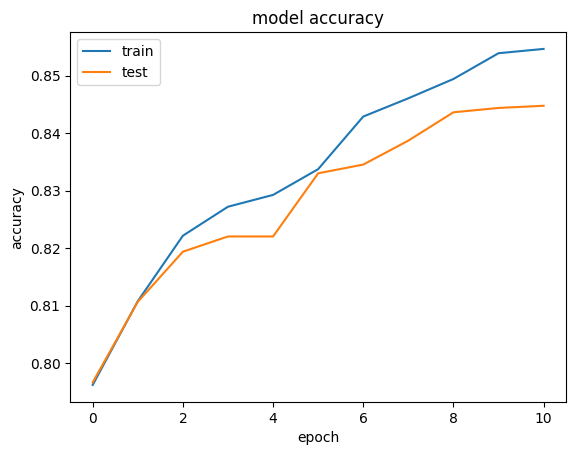

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

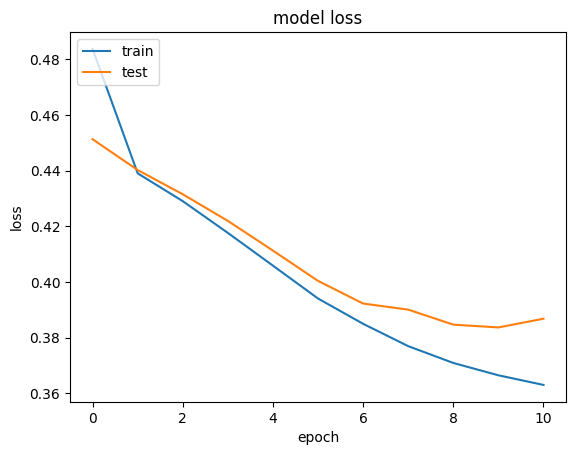

In [ ]:
##Summerizing the history for Accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Part-3

##Prediction for the tets Data

In [ ]:
#prediction for the test set results
y_pred=classifier.predict(X_test)

y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1560,   35],
       [ 241,  164]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.862

In [ ]:
##get the weights
classifier.get_weights()

[array([[ 0.2354148 , -0.02742589, -0.06103737, -0.07647876,  0.04405878,
         -0.02991141,  0.10518816,  0.39428633,  0.13222106, -0.28446087,
         -0.05147959],
        [ 0.26601273,  0.92427593, -0.5934026 ,  0.12085781,  0.02935732,
          0.14133894, -0.20572546, -0.32291177,  0.13366823,  0.09910505,
         -0.3317848 ],
        [-0.05582104, -0.0390247 , -0.2302837 , -0.1084936 , -0.05820533,
         -0.00897201,  0.04053376, -0.06183262, -0.04662113,  0.2253117 ,
          0.13328928],
        [ 0.1960758 , -0.4093806 ,  0.22714412,  0.01854953,  0.08179054,
         -0.05120718, -0.14718187,  0.01329632, -0.33309847,  0.04605811,
         -0.42030764],
        [-0.04234744, -0.47354054, -0.08010928, -0.17565383,  1.1276464 ,
         -0.5741161 ,  0.24763818, -0.29499844,  0.37934765,  0.06641221,
          0.12269707],
        [-0.1542438 , -0.1548434 ,  0.08450451, -0.1769823 , -0.12347899,
         -0.30581236,  0.16485357, -0.0437042 , -0.09946592,  0.1044619